In [11]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer 
import scipy.stats as stats

In [12]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
X = df[["total_bill", "size"]]
y = df["tip"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
print("Test R² Score:", r2_score(y_test, y_pred))


cv_scores = cross_val_score(lr, X, y, cv=5, scoring="r2")

print("Cross-validated R²:", np.mean(cv_scores))

Test R² Score: 0.4811084097989491
Cross-validated R²: 0.4657337813038721


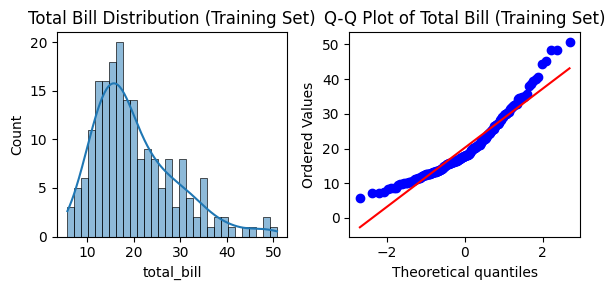

In [14]:
plt.figure(figsize=(6, 3))


plt.subplot(1, 2, 1)
sns.histplot(X_train['total_bill'], bins=30, kde=True)
plt.title('Total Bill Distribution (Training Set)')


plt.subplot(1, 2, 2)
stats.probplot(X_train['total_bill'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Bill (Training Set)')

plt.tight_layout()
plt.show()


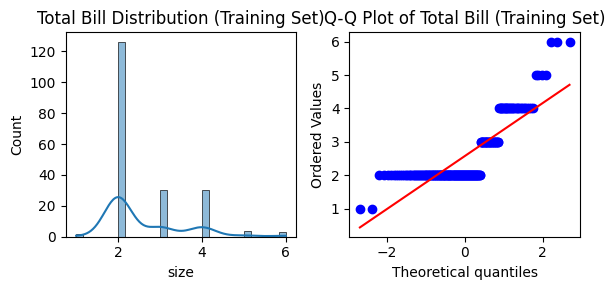

In [15]:
plt.figure(figsize=(6, 3))


plt.subplot(1, 2, 1)
sns.histplot(X_train['size'], bins=30, kde=True)
plt.title('Total Bill Distribution (Training Set)')


plt.subplot(1, 2, 2)
stats.probplot(X_train['size'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Bill (Training Set)')

plt.tight_layout()
plt.show()


In [16]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [17]:
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train[['total_bill']])
X_test_transformed = pt.transform(X_test[['total_bill']])

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred_test = lr.predict(X_test_transformed)
print('Test R2 score:', r2_score(y_test, y_pred_test))

cv_r2 = cross_val_score(lr, X_train_transformed, y_train, cv=5, scoring='r2')
print('Cross-validated R2:', np.mean(cv_r2))


Test R2 score: 0.5027528333134597
Cross-validated R2: 0.31715713865976897


In [18]:
df.shape

(244, 7)

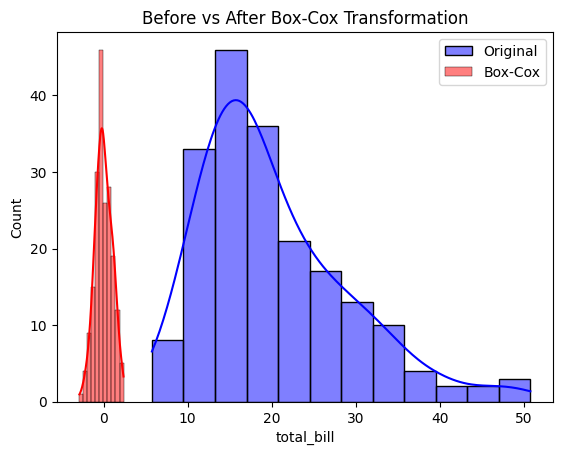

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(X_train['total_bill'], kde=True, label='Original', color='blue')
sns.histplot(X_train_transformed.flatten(), kde=True, label='Box-Cox', color='red')
plt.legend()
plt.title("Before vs After box-Cox transformation")
plt.show()


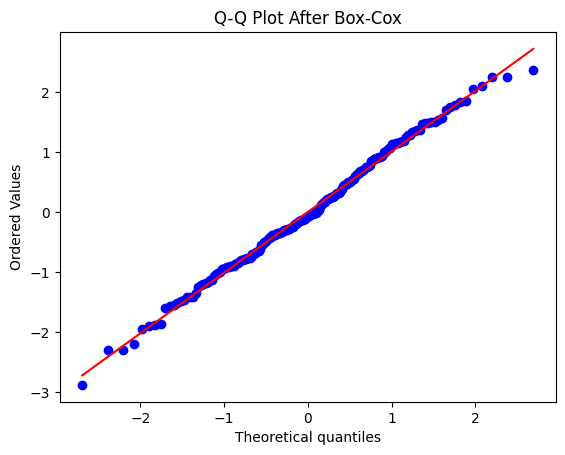

In [ ]:
from scipy import stats
stats.probplot(X_train_transformed.flatten(), dist="norm", plot=plt)
plt.title('Q-Q plot After box-cox')
plt.show()
